In [9]:
!pip install -U selenium
!pip install webdriver-manager

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By

import time

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('headless') # O mais importante, não renderiza parte gráfica
options.add_argument('window-size=1920x1080')

In [4]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [5]:
def find(driver):
    element = driver.find_element(By.TAG_NAME, 'content')
    if element:
        return element
    else:
        return False

In [7]:
url_1 = 'https://ufrn.br/imprensa/noticias/filtros?text=eaj'
driver.get(url_1)
time.sleep(5)
text_to_cloud = ''

numPagC = driver.find_elements(By.XPATH, '//*[@id="noticias-paginacao"]/li[8]/a')[0];
numPag = int(numPagC.text) + 1
print(numPag)

24


In [8]:
for j in range(1,numPag):
    print('Pag atual: ', j) 
    
    #obtém lista de notícias (inclui 2 itens que não são notícias)
    title_news = driver.find_elements(By.CLASS_NAME, 'blue-link');
    n_news = len(title_news) #quantas notícias na página atual + 2
    print('n_news: ', n_news) #valor de fato diminuir 2
    
    #guarda todos os links de notícia da página atual
    title_news_hrefs = []
    for i in range(1, n_news):
        title_news_hrefs.append(title_news[i].get_attribute('href'))

    
    for i in range(1, len(title_news_hrefs)):
        link = title_news_hrefs[i]     
        if 'imprensa' in link:
            print(link)
            driver.get(link) 
            time.sleep(5)
            news_text = WebDriverWait(driver, 100).until(find)
            text_to_cloud += news_text.text
            driver.back()
            time.sleep(2)
        if i == len(title_news_hrefs) - 1: #se já leu a última notícia da página k, sinalizar para ir para k+1
            print('-------Terminei esta página, vou para a próxima página------')
            try:
                driver.find_element(By.XPATH, '//*[@id="noticias-paginacao"]/li[9]/a').click() #último elemento é o símbolo > de próxima página
                time.sleep(5)
                mudou = True
            except ex.NoSuchElementException:
                driver.refresh()
            
                             
print(text_to_cloud)  

Pag atual:  1
n_news:  12
https://ufrn.br/imprensa/noticias/64036/eaj-inicia-projeto-de-matrizes-de-umbu-cajazeiras
https://ufrn.br/imprensa/noticias/64019/eaj-realiza-formatura-de-turmas-do-subsequente
https://ufrn.br/imprensa/noticias/63870/curso-de-gastronomia-da-eaj-promove-a-lanchonete-escola
https://ufrn.br/imprensa/noticias/63296/eaj-conquista-premio-maker-na-olimpiada-brasileira-de-robotica
https://ufrn.br/imprensa/noticias/63240/estudante-da-eaj-conquista-medalha-de-bronze-na-olimpiada-brasileira-de-robotica
https://ufrn.br/imprensa/noticias/63170/eaj-conquista-1o-lugar-na-fase-estadual-da-obr
https://ufrn.br/imprensa/noticias/63135/eaj-participa-de-etapa-estadual-da-obr-neste-domingo
https://ufrn.br/imprensa/noticias/62901/eaj-promove-o-capacitacao-terra-brasil
https://ufrn.br/imprensa/noticias/62813/eaj-seleciona-professores-para-programa-voltado-a-agricultura-familiar
https://ufrn.br/imprensa/noticias/62485/eaj-realiza-leilao-de-bovinos-da-raca-girolando
-------Terminei est

In [61]:
text_to_cloud

'Para fortalecer a cadeia produtiva da fruticultura no Rio Grande do Norte, a Escola Agrícola de Jundiaí (EAJ/UFRN) iniciou o projeto Estabelecimento de matrizes de umbu-cajazeira (Spondia sp) na Área de Experimentação Agronômica da Escola Agrícola de Jundiaí. A ação visa inserir tecnologias de produção e diversificação de espécies com elevado potencial econômico e social para os fruticultores da região. A implementação ocorrerá por meio de ações de pesquisa, estruturação para capacitação de produtores, produção e distribuição de mudas de qualidade e assistência técnica direcionada para qualificar e ampliar a capacidade de áreas produtivas.\nNo início deste mês, a equipe envolvida plantou mudas de umbu-cajá com o objetivo de formar matrizes para que o material das plantas seja utilizado em trabalhos científicos. A utilização se dá, por exemplo, com a colheita dos frutos para plantio de novas árvores e com a retirada de material propagativo, como estaquia – processo que usa um fragmento

In [11]:
!pip install wordcloud

In [9]:
from wordcloud import WordCloud, STOPWORDS

STOPWORDS = ['ver','principal','essa','vez','nas','mas',
             'qual','principal','ele','ter','doença','pois','este',
             'vez','ver principal','artigo principal','já',
             'aos','pode','outro','artigo','desse',
             'alguns','meio','entre','das','podem','esse',
             'seu','também','são','quando','de', 'que','em',
             'os','as','da','como','dos','ou','se','um','uma',
             'para','na','ao','mais','por','não','ainda','muito','sua',
             'a', 'é', 'o', 'e', 'no', 'do', 'pelo', 'todo', 'todos', 'sobre', 'com', 'foi']

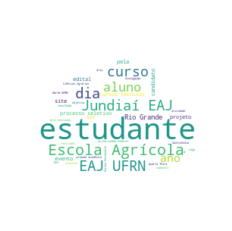

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
#dataset = open("sampleWords.txt", "r").read()
def create_word_cloud(string):
   maskArray = np.array(Image.open("cloud.jpg")) #uso do numpy
   cloud = WordCloud(background_color = "white", max_font_size=50, max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("wordCloud.png")
   plt.figure()
   plt.imshow(cloud, interpolation='bilinear')
   plt.axis('off')
#dataset = dataset.lower()
create_word_cloud(text_to_cloud)